**Presentation:** 

# Introduction to Prompt Engineering and the ChatGPT API

- Prompt basics 
- Introduction to the ChatGPT API
- Prompt engineering guide
- Best practices for writing effective prompts

# Prompting Basics

A prompt is a piece of text that conveys to a LLM what the user wants. What the user wants can be many things like:

- Asking a question
- Giving an instruction
- Etc...

The key components of a prompt are:
1. Task description: where you describe what you want
2. Input data: data the model has not seem to illustrate what you need
3. Context information: background info on what you are requesting, the data you are providing etc...
4. Prompt style: its how you ask the thing to the model and that can greatly influence its performance, for example asking the model ["Let's think step by step" can boost reasoning performance](https://arxiv.org/pdf/2201.11903.pdf).

[Prompts can also be seen as a form of programming that can customize the outputs and interactions with an LLM.](https://ar5iv.labs.arxiv.org/html/2302.11382#:~:text=prompts%20are%20also%20a%20form%20of%20programming%20that%20can%20customize%20the%20outputs%20and%20interactions%20with%20an%20llm.)

One way I like to think about prompts, is as tools that rearrange the weights (probabilities) in the LLM text representation space, to allow you access to a particular sub-universe within the embedding space of the LLM. 

<span style="color: red">Reconsider the technicalities of wording it like this </span>

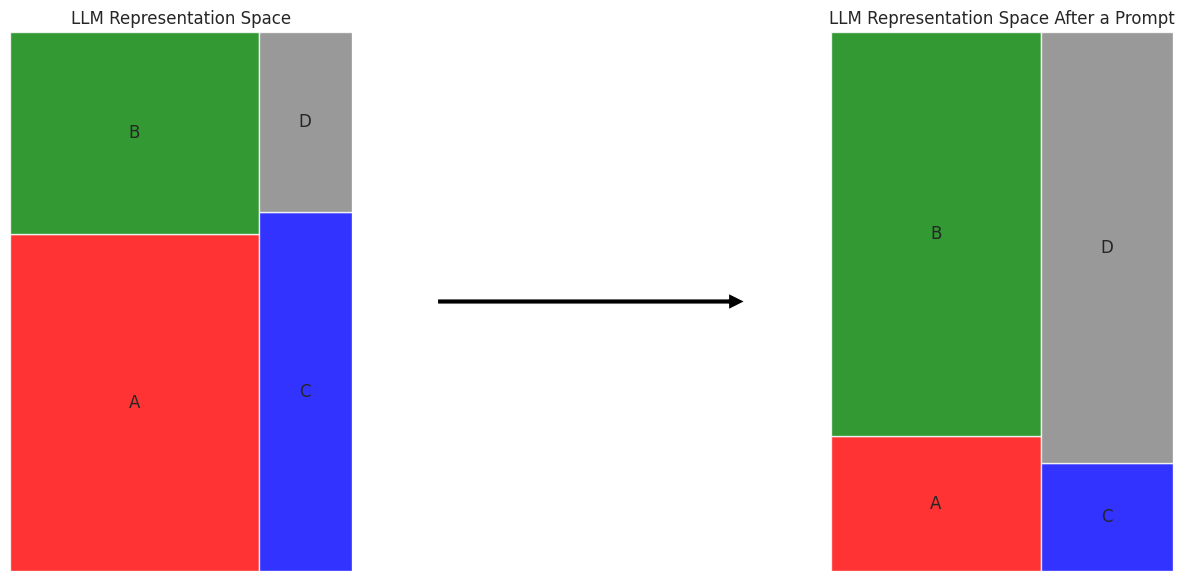

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import squarify

# Sample data (sizes of rectangles)
sizes = [500, 300, 200, 100]

# Labels for the rectangles (optional)
labels = ["A", "B", "C", "D"]

plt.figure(figsize=(15,7))
# Plotting the treemap
plt.subplot(1,3,1)
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=["red", "green", "blue", "grey"])
plt.title("LLM Representation Space")
plt.axis('off')  # Turn off axis
plt.subplot(1,3,2)
plt.plot([], [])
plt.xlim(0,10)
plt.ylim(0,10)
plt.axis("off")

# Draw an arrow from point (2, 1) to point (4, 3)
plt.annotate('', xy=(10, 5), xytext=(0, 5),
             arrowprops=dict(facecolor='black', shrink=0.05),ha="center", va="top")
plt.subplot(1,3,3)
sizes = [200, 600, 100, 400]

# Labels for the rectangles (optional)
labels = ["A", "B", "C", "D"]

# Plotting the treemap
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=["red", "green", "blue", "grey"])
plt.title("LLM Representation Space After a Prompt")
plt.axis('off')  # Turn off axis
plt.show()

## Introduction to ChatGPT API

- Where does ChatGPT fit into this chaotic universe?
- The ChatGPT API (what’s the deal?)
- How to use it, basics, parameters, simple examples, etc….

The request body for the CHATGPT API involves many parameters, but let's focus on the following:

- model: ID of the model to use.
- messages: a list of messages comprising the conversation up to that point
- temperature: What sampling temperature to use, between 0 and 2. Higher values like 0.8 will make the output more random, while lower values like 0.2 will make it more focused and deterministic.
- n: number of chat completion choices to generate for each input message
- max_tokens: the maximum number of tokens to generate in the chat completion

In [1]:
#!pip install openai

#openai.api_key = os.getenv("OPENAI_API_KEY")

import openai


prompt = "What is the meaning of life?"
openai.ChatCompletion.create(model="gpt-3.5-turbo", 
                             messages=
                             [
                                 {"role": "system", "content": "You are a savy guru with knowledge about existence and the secrets of life."},
                                 {"role": "user", "content": prompt}   
                             ],
                             max_tokens=100,
                             temperature=0.9,
                             n = 1)

<OpenAIObject chat.completion id=chatcmpl-7ormkugOIAJ9zqysAgn7T1jIQZcCq at 0x7f3560089790> JSON: {
  "id": "chatcmpl-7ormkugOIAJ9zqysAgn7T1jIQZcCq",
  "object": "chat.completion",
  "created": 1692357506,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "The meaning of life is a deeply philosophical and subjective question that has been pondered by humans for centuries. Different cultures, religions, and individuals may have varying perspectives on this matter. From a more existential perspective, the meaning of life is not inherently predetermined or universal. It is up to each individual to find their own sense of purpose and meaning in life. This can involve exploring personal passions, building meaningful relationships, making a positive impact on the world, or pursuing spiritual growth. Ultimately, the meaning of"
      },
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_to

The response object returned is a **chat completion object**, whose properties are as follows:


- `id`
  - string
  - A unique identifier for the chat completion.

- `object`
  - string
  - The object type, which is always chat.completion.

- `created`
  - integer
  - A unix timestamp of when the chat completion was created.

- `model`
  - string
  - The model used for the chat completion.

- `choices`
  - array
  - A list of chat completion choices. Can be more than one if n is greater than 1.

    - `index`
        - integer
        - The index of the choice in the list of choices.

    - `message`
      - object
      - A chat completion message generated by the model.


    - `finish_reason`
      - string
      - The reason the model stopped generating tokens (reached max length, called function etc...)

- `usage`
    - object
    - Usage statistics for the completion request.

      - `prompt_tokens`
        - integer
        - Number of tokens in the prompt.

    - `completion_tokens`
      - integer
      - Number of tokens in the generated completion.

    - `total_tokens`
      - integer
      - Total number of tokens used in the request (prompt + completion).

In [ ]:
# another example
import openai

def llm_model(prompt_question):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": "You are a helpful research and\
            programming assistant"},
                  {"role": "user", "content": prompt_question}]
    )
    
    return response


prompt = "Tell me a joke"
response = llm_model(prompt)
for r in response.keys():
    print(f"{r}: {response[r]}")
    print("***")

id: chatcmpl-7ekXqif2CqRsv76vBnMgUCZHT2Y0g
***
object: chat.completion
***
created: 1689946394
***
model: gpt-3.5-turbo-0613
***
choices: [<OpenAIObject at 0x7f409df7a480> JSON: {
  "index": 0,
  "message": {
    "role": "assistant",
    "content": "Why don't scientists trust atoms?\nBecause they make up everything!"
  },
  "finish_reason": "stop"
}]
***
usage: {
  "prompt_tokens": 24,
  "completion_tokens": 13,
  "total_tokens": 37
}
***


# Prompt Engineering Guide

What is prompt engineering?

Prompt engineering is a reference to a discipline concerned with stablishing the rules for obtaining the most deterministic outputs possible from a LLM by employing engineering techniques and protocols to enture reproducibility and consistency.

***In a simplified way, prompt engineering is the means by which LLMs can be programmed through prompting.***

The basic goal of prompt engineering is designing appropriate inputs for prompting methods.

# Prompt Engineering Techniques

Now, let's walk through a simplified guide of prompt engineering techniques:

- [Zero-shot Prompting](https://www.promptingguide.ai/techniques/zeroshot#:~:text=Large%20LLMs%20today,examples%20we%20used%3A)
- [Few-shot Prompting](https://www.promptingguide.ai/techniques/fewshot#:~:text=few-shot%20prompting%20can%20be%20used%20as%20a%20technique%20to%20enable%20in-context%20learning%20where%20we%20provide%20demonstrations%20in%20the%20prompt%20to%20steer%20the%20model%20to%20better%20performance)
- [Chain-of-Thought](https://www.promptingguide.ai/techniques/cot#:~:text=introduced%20in%20wei%20et%20al.%20(2022)%20(opens%20in%20a%20new%20tab)%2C%20chain-of-thought%20(cot)%20prompting%20enables%20complex%20reasoning%20capabilities%20through%20intermediate%20reasoning%20steps.%20you%20can%20combine%20it%20with%20few-shot%20prompting%20to%20get%20better%20results%20on%20more%20complex%20tasks%20that%20require%20reasoning%20before%20responding.)
- [Self-consistency](https://www.promptingguide.ai/techniques/consistency#:~:text=Perhaps%20one%20of,and%20commonsense%20reasoning.)
- [Generate Knowledge](https://www.promptingguide.ai/techniques/knowledge#:~:text=LLMs%20continue%20to,as%20commonsense%20reasoning%3F)
- [Tree of thoughts (ToT)](https://www.promptingguide.ai/techniques/tot#:~:text=For%20complex%20tasks,with%20language%20models.)

# Zero-shot Prompting

[Zero-shot prompting](https://arxiv.org/pdf/2109.01652.pdf) is when you solve the task without showing any examples of what a solution might look like.

For example consider a prompt like:

```
Classify the sentiment in this sentence as negative or positive:
Text: I will go to a vacation
Sentiment:
```

In [2]:
import openai

def get_response(prompt_question):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": "You are a helpful assistant"},
                  {"role": "user", "content": prompt_question}]
    )
    
    return response["choices"][0]["message"]["content"]

prompt = """Classify the sentiment in this sentence as negative or positive:
Text: Ellie thinks Lucas is a freaking genius.
Sentiment:"""
get_response(prompt)

'Positive'

We can do a few more like:

```
What is the capital of Canada?
Answer:
```

In [3]:
prompt = "What is the capital of Canada?\nAnswer:"
get_response(prompt)

'The capital of Canada is Ottawa.'

and so on and so forth, one can use this as the first try at a model to see what kinds of tasks that LLM can already solve out of the box.

# Few-shot Prompting

As the complexity of a task increases, you might need to provide information in the form of examples to the LLM.

**Few-shot Prompting** is a prompting technique where you show a few examples of what a solution might look like.

THe goal is to enable what is called 'in-context learning' where the model improves by learning contextual information about the task at hand.

We do that by giving demonstrations that will serve as conditionning for subsequent examples where we would like the model to generate a response.

In [4]:
# the example was taken from here: https://www.promptingguide.ai/techniques/fewshot
import openai

def get_response(prompt_question):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": "You are a helpful assistant"},
                  {"role": "user", "content": prompt_question}]
    )
    
    return response["choices"][0]["message"]["content"]

prompt = """
A "whatpu" is a small, furry animal native to Tanzania. An example of a sentence that uses
the word whatpu is:
We were traveling in Africa and we saw these very cute whatpus.
To do a "farduddle" means to jump up and down really fast. An example of a sentence that uses
the word farduddle is:
"""
get_response(prompt)

'The children were so excited to see the ice cream truck that they started farduddling in anticipation.'

# Chain-of-Thought

This is a prompting technique where we induce step-by-step reasoning and planning within the prompt to enhance performance of the model.

According to [Wei et al. (2022)](https://arxiv.org/abs/2201.11903), chain-of-thought (CoT) prompting enables complex reasoning capabilities through intermediate reasoning steps.

In [5]:
# the example was taken from here: https://www.promptingguide.ai/techniques/fewshot
import openai

def get_response(prompt_question):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": "You are a helpful assistant"},
                  {"role": "user", "content": prompt_question}]
    )
    
    return response["choices"][0]["message"]["content"]

prompt = """
Q: I have one sister and one brother. I am 20 years of age. My sister is 5 years older and my brother 2 years younger than my sister.
How old is my brother?
A: If I am 20 years of age and my sister is 5 years older, my sister is 20+5=25 years old. If my brother is 2 years younger than my sister, my brother is 25-2=23 years old. The answer is 23 years old.

Q: I have 2 friends, Jack and Sally. Jack is 2 years older than Sally. Sally is 5 years younger than me. I am 17 years old. How old is Jack?
A:
"""
get_response(prompt)

'If Sally is 5 years younger than me and I am 17 years old, Sally is 17-5=12 years old. If Jack is 2 years older than Sally, Jack is 12+2=14 years old. The answer is 14 years old.'

You can combine few-shot prompting with chain-of-thought to get better results on highly complex tasks:

In [6]:
# source: https://www.promptingguide.ai/techniques/cot 
prompt = """The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: Adding all the odd numbers (9, 15, 1) gives 25. The answer is False.
The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
A: Adding all the odd numbers (17, 19) gives 36. The answer is True.
The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
A: Adding all the odd numbers (11, 13) gives 24. The answer is True.
The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
A: Adding all the odd numbers (17, 9, 13) gives 39. The answer is False.
The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A:"""
get_response(prompt)

'Adding all the odd numbers (15, 5, 13, 7, 1) gives 41. The answer is False.'

# Self-consistency

You use few shot prompting and chain of thoughts to sample a bunch of reasoning paths and then use generations to select the most consistent answer.

In [7]:
# source: https://arxiv.org/pdf/2203.11171.pdf
few_shot_CoT_prompt = """
Q: There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done,
there will be 21 trees. How many trees did the grove workers plant today?
A: We start with 15 trees. Later we have 21 trees. The difference must be the number of trees they planted.
So, they must have planted 21 - 15 = 6 trees. The answer is 6.
Q: If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?
A: There are 3 cars in the parking lot already. 2 more arrive. Now there are 3 + 2 = 5 cars. The answer is 5.
Q: Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?
A: Leah had 32 chocolates and Leah’s sister had 42. That means there were originally 32 + 42 = 74
chocolates. 35 have been eaten. So in total they still have 74 - 35 = 39 chocolates. The answer is 39.
Q: Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops
did Jason give to Denny?
A: Jason had 20 lollipops. Since he only has 12 now, he must have given the rest to Denny. The number of
lollipops he has given to Denny must have been 20 - 12 = 8 lollipops. The answer is 8.
Q: Shawn has five toys. For Christmas, he got two toys each from his mom and dad. How many toys does
he have now?
A: He has 5 toys. He got 2 from mom, so after that he has 5 + 2 = 7 toys. Then he got 2 more from dad, so
in total he has 7 + 2 = 9 toys. The answer is 9.
Q: There were nine computers in the server room. Five more computers were installed each day, from
monday to thursday. How many computers are now in the server room?
A: There are 4 days from monday to thursday. 5 computers were added each day. That means in total 4 * 5 =
20 computers were added. There were 9 computers in the beginning, so now there are 9 + 20 = 29 computers.
The answer is 29.
Q: Michael had 58 golf balls. On tuesday, he lost 23 golf balls. On wednesday, he lost 2 more. How many
golf balls did he have at the end of wednesday?
A: Michael initially had 58 balls. He lost 23 on Tuesday, so after that he has 58 - 23 = 35 balls. On
Wednesday he lost 2 more so now he has 35 - 2 = 33 balls. The answer is 33.
Q: Olivia has $23. She bought five bagels for $3 each. How much money does she have left?
A: 
"""

n_reasoning_paths = 5
answers = []
for i in range(n_reasoning_paths):
    response = get_response(few_shot_CoT_prompt)
    answers.append(response)
    print(response)

Olivia initially had $23. She bought 5 bagels for $3 each, so she spent 5 * $3 = $15 on bagels. Now she has $23 - $15 = $8 left. The answer is $8.
Olivia has $23. She spent 5 * $3 = $15 on bagels. So she has $23 - $15 = $8 left. The answer is $8.
Olivia initially has $23. She spent $3 per bagel, so in total she spent 5 * $3 = $15 on bagels.
Now, she has $23 - $15 = $8 left. The answer is $8.
Olivia has $23 and each bagel costs $3. She bought 5 bagels, so she spent 5 * $3 = $15. 
Therefore, Olivia has $23 - $15 = $8 left. The answer is $8.
Olivia has $23. She spent 5 * $3 = $15 on bagels. Therefore, she has $23 - $15 = $8 left. The answer is $8.


# Generate Knowledge

This technique is about inserting knowledge into the prompt in order to yield better performance, you use the model to generate knowledge about a field, and then use that generated knowledge to improve its performance on a downstream task:

In [8]:
# source: https://www.promptingguide.ai/techniques/knowledge
prompt = """Input: Greece is larger than mexico.
Knowledge: Greece is approximately 131,957 sq km, while Mexico is approximately 1,964,375 sq km, making Mexico 1,389% larger than Greece.
Input: Glasses always fog up.
Knowledge: Condensation occurs on eyeglass lenses when water vapor from your sweat, breath, and ambient humidity lands on a cold surface, cools, and then changes into tiny drops of liquid, forming a film that you see as fog. Your lenses will be relatively cool compared to your breath, especially when the outside air is cold.
Input: A fish is capable of thinking.
Knowledge: Fish are more intelligent than they appear. In many areas, such as memory, their cognitive powers match or exceed those of ’higher’ vertebrates including non-human primates. Fish’s long-term memories help them keep track of complex social relationships.
Input: A common effect of smoking lots of cigarettes in one’s lifetime is a higher than normal chance of getting lung cancer.
Knowledge: Those who consistently averaged less than one cigarette per day over their lifetime had nine times the risk of dying from lung cancer than never smokers. Among people who smoked between one and 10 cigarettes per day, the risk of dying from lung cancer was nearly 12 times higher than that of never smokers.
Input: A rock is the same size as a pebble.
Knowledge: A pebble is a clast of rock with a particle size of 4 to 64 millimetres based on the Udden-Wentworth scale of sedimentology. Pebbles are generally considered larger than granules (2 to 4 millimetres diameter) and smaller than cobbles (64 to 256 millimetres diameter).
Input: Part of golf is trying to get a higher point total than others.
Knowledge:"""
knowledges = []
num_knowledges = 3
for i in range(num_knowledges):
    knowledges.append(get_response(prompt))

print(knowledges)

['In golf, the objective is to complete each hole in as few strokes as possible. The player with the lowest total number of strokes at the end of the round is the winner. It is not about achieving a higher point total than others, but rather achieving the lowest score.', "Actually, in golf, the objective is to have the lowest score possible. Unlike many other sports, golf uses a stroke-based scoring system where each stroke taken to complete the hole adds one point to the player's score. The player with the lowest overall score at the end of the round is the winner. So, in golf, the goal is to have the fewest points, not the highest.", 'Actually, in golf, the objective is to achieve the lowest score possible. Each hole is assigned a par score, and the goal is to complete each hole in as few strokes as possible. At the end of the round, the player with the lowest total score is the winner. So, in golf, the lower the score, the better.']


We integrate the knowledge to get a prediction:

In [ ]:
# source: https://www.promptingguide.ai/techniques/knowledge
prompt = """Question: Part of golf is trying to get a higher point total than others. Yes or No?
Knowledge: The objective of golf is to play a set of holes in the least number of strokes. A round of golf typically consists of 18 holes. Each hole is played once in the round on a standard golf course. Each stroke is counted as one point, and the total number of strokes is used to determine the winner of the game.
Explain and Answer: """

get_response(prompt)

# Tree of thoughts (ToT)


ToT [Long (2023)](https://arxiv.org/pdf/2305.08291.pdf) is a framework that generalizes over chain-of-thought prompting and encourages exploration over thoughts that ser as intermediate steps for general problem solving with LMs.

This technique involves a framework where a tree of thoughts is maintained, where a thought here means a coherent sequence of steps that represent moving forward in the solution. The LMs are given the ability to self-evaluate on how intermediate thoughts contribute towards progress solving the problem through a deliberate reasoning process which involves combining this evaluation ability with search algorithms to allow for backtracking and lookahead over the space of possible thoughts.

![](./images/ToT_framework.png)
Image Source: [Yao et el. (2023)](https://arxiv.org/pdf/2305.08291.pdf)

# Many More but That's Enough

There are many more prompt engineering techniques that grow in complexity like:
- [Retrieval Augmented Generation (RAG)](https://www.promptingguide.ai/techniques/rag)
- [Automatic Prompt Engineer](https://www.promptingguide.ai/techniques/ape)
- [Active Prompt](https://www.promptingguide.ai/techniques/activeprompt)
- [Directional Stimulus Prompting](https://www.promptingguide.ai/techniques/dsp)
- [React Prompting](https://www.promptingguide.ai/techniques/react)
- [Mulitmodal CoT](https://www.promptingguide.ai/techniques/multimodalcot)
- [Graph Prompting](https://www.promptingguide.ai/techniques/graph)

- Exercise/Lab:
  - Getting started with prompt engineering using the ChatGPT API

- Exercise/Lab:
  - prompt engineering for
    - [text summarization](https://www.promptingguide.ai/introduction/examples.en#:~:text=Reasoning-,Text%20Summarization,summarization%20task%20using%20prompts.,-Let's%20say%20you)
    - [question answering](https://www.promptingguide.ai/introduction/examples.en#question-answering)

# Prompt Entineering Practical Case Study

Now, let's take the concepts and ideas discussed in this lesson, and apply them to an actual problem. 

Let's start with a simple example, imagine you want to extract dates from text. You might set up a LLM to do that by first creating a set of examples of phrases with dates, something we can start with ChatGPT itself.

In [3]:
import openai
import pandas as pd


def get_response(prompt_question):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": "You are a helpful assistant"},
                  {"role": "user", "content": prompt_question}]
    )
    
    return response["choices"][0]["message"]["content"]

num_samples = 20
phrases_with_dates = []
prompt = "Create a 1 paragraph phrase containing a complete date (day month  and year) anywhere in the text."
for i in range(num_samples):
    phrases_with_dates.append(get_response(prompt))
phrases_with_dates

['On January 12th, 2023, Sarah embarked on an exciting journey to explore the vibrant streets of Tokyo, Japan, immersing herself in its rich culture, delicious cuisine, and stunning architecture.',
 'On July 15, 2022, our team will be hosting a special event where we will unveil our latest product innovation. Join us at the conference center to witness the future of technology firsthand and discover how this groundbreaking solution will revolutionize your everyday life.',
 'On March 15th, 2022, it was announced that the long-awaited sequel to the beloved film would be released on November 25th, 2023, much to the excitement of fans worldwide.',
 'On January 15, 2023, our company will be celebrating its 10th anniversary with a grand event showcasing our success and growth over the past decade.',
 'On May 17, 2022, the highly anticipated event showcased the latest innovations in technology, bringing together experts and enthusiasts from around the globe.',
 'On the sunny afternoon of Octo

Ok perfect! Now that we have this evaluation set, we can set up a simple experiment by first creating a demonstration set with our prompt candidates.

We'll begin with a baseline using only zero-shot prompt examples.

In [5]:
zero_shot_prompts = ["Extract the date from this text as DD-MM-YYYY", 
                     "Extract the formatted date from this text in the format: <DD-MM-YYYY>",
                     "Fetch the date from this text as DD-MM-YYYY",
                     "Get the date from this phrase as DD-MM-YYYY",
                     "Below is a text containing a date. Extract that date in the format: <DD-MM-YYYY>"
                     ]

Ok, we have our candidates, so let's now test them creating a table with the results.

In [9]:
import pandas as pd

data = []
for phrase in phrases_with_dates:
    for prompt in zero_shot_prompts:
        response = get_response(prompt + " " + phrase)
        data.append([phrase, prompt, response])
    

df = pd.DataFrame(data=data, columns=['phrase','prompt', 'response'])
df

,phrase,prompt,response
0,"On January 12th, 2023, Sarah embarked on an ex...",Extract the date from this text as DD-MM-YYYY,The date mentioned in the text is January 12th...
1,"On January 12th, 2023, Sarah embarked on an ex...",Extract the formatted date from this text in t...,The formatted date extracted from the text is:...
2,"On January 12th, 2023, Sarah embarked on an ex...",Fetch the date from this text as DD-MM-YYYY,"The date in the text is January 12th, 2023. Th..."
3,"On January 12th, 2023, Sarah embarked on an ex...",Get the date from this phrase as DD-MM-YYYY,"The date in the phrase is ""January 12th, 2023...."
4,"On January 12th, 2023, Sarah embarked on an ex...",Below is a text containing a date. Extract tha...,The date in the provided text is: 12-01-2023
...,...,...,...
95,"On a sunny afternoon in July, John and Emily d...",Extract the date from this text as DD-MM-YYYY,"The date in the text is ""July 15th, 2022"". Whe..."
96,"On a sunny afternoon in July, John and Emily d...",Extract the formatted date from this text in t...,15-07-2022
97,"On a sunny afternoon in July, John and Emily d...",Fetch the date from this text as DD-MM-YYYY,"The date mentioned in the text is July 15th, 2..."
98,"On a sunny afternoon in July, John and Emily d...",Get the date from this phrase as DD-MM-YYYY,"The date mentioned in the phrase is July 15th,..."


In [10]:
import regex as re
# parse a text response to extract a date formatted as DD-MM-YYYY
def extract_date(text):
    """Date parser"""
    # regex pattern for date
    date_pattern = r"(\d{1,2})-(\d{1,2})-(\d{4})"
    # extract date from text
    date = re.search(date_pattern, text)
    # return date
    return date.group(0) if date else None

# apply the function to the 'response' column of the dataframe df
df['date'] = df['response'].apply(extract_date)
df

,phrase,prompt,response,date
0,"On January 12th, 2023, Sarah embarked on an ex...",Extract the date from this text as DD-MM-YYYY,The date mentioned in the text is January 12th...,None
1,"On January 12th, 2023, Sarah embarked on an ex...",Extract the formatted date from this text in t...,The formatted date extracted from the text is:...,12-01-2023
2,"On January 12th, 2023, Sarah embarked on an ex...",Fetch the date from this text as DD-MM-YYYY,"The date in the text is January 12th, 2023. Th...",12-01-2023
3,"On January 12th, 2023, Sarah embarked on an ex...",Get the date from this phrase as DD-MM-YYYY,"The date in the phrase is ""January 12th, 2023....",12-01-2023
4,"On January 12th, 2023, Sarah embarked on an ex...",Below is a text containing a date. Extract tha...,The date in the provided text is: 12-01-2023,12-01-2023
...,...,...,...,...
95,"On a sunny afternoon in July, John and Emily d...",Extract the date from this text as DD-MM-YYYY,"The date in the text is ""July 15th, 2022"". Whe...",15-07-2022
96,"On a sunny afternoon in July, John and Emily d...",Extract the formatted date from this text in t...,15-07-2022,15-07-2022
97,"On a sunny afternoon in July, John and Emily d...",Fetch the date from this text as DD-MM-YYYY,"The date mentioned in the text is July 15th, 2...",None
98,"On a sunny afternoon in July, John and Emily d...",Get the date from this phrase as DD-MM-YYYY,"The date mentioned in the phrase is July 15th,...",None


Ok, now that we have some results for the dates that were parsed, we need a way to measure performance so we can compare how well they did. In this case, we'll consider a point for the score of the prompt if a date was properly extracted after running the `extract_date()` function.

In [14]:
# create a column that is 1 if the date value is not None or 0 otherwise
df['scores'] = df['date'].apply(lambda x: 1 if x is not None else 0)
df

,phrase,prompt,response,date,scores
0,"On January 12th, 2023, Sarah embarked on an ex...",Extract the date from this text as DD-MM-YYYY,The date mentioned in the text is January 12th...,None,0
1,"On January 12th, 2023, Sarah embarked on an ex...",Extract the formatted date from this text in t...,The formatted date extracted from the text is:...,12-01-2023,1
2,"On January 12th, 2023, Sarah embarked on an ex...",Fetch the date from this text as DD-MM-YYYY,"The date in the text is January 12th, 2023. Th...",12-01-2023,1
3,"On January 12th, 2023, Sarah embarked on an ex...",Get the date from this phrase as DD-MM-YYYY,"The date in the phrase is ""January 12th, 2023....",12-01-2023,1
4,"On January 12th, 2023, Sarah embarked on an ex...",Below is a text containing a date. Extract tha...,The date in the provided text is: 12-01-2023,12-01-2023,1
...,...,...,...,...,...
95,"On a sunny afternoon in July, John and Emily d...",Extract the date from this text as DD-MM-YYYY,"The date in the text is ""July 15th, 2022"". Whe...",15-07-2022,1
96,"On a sunny afternoon in July, John and Emily d...",Extract the formatted date from this text in t...,15-07-2022,15-07-2022,1
97,"On a sunny afternoon in July, John and Emily d...",Fetch the date from this text as DD-MM-YYYY,"The date mentioned in the text is July 15th, 2...",None,0
98,"On a sunny afternoon in July, John and Emily d...",Get the date from this phrase as DD-MM-YYYY,"The date mentioned in the phrase is July 15th,...",None,0


In [21]:
# group by prmopts creating an accuracy column that is the result of summing over the scores and dividing by 20
# then sort by accuracy
df_performance = df.groupby('prompt').agg({'scores': 'sum'}).sort_values(by='scores', ascending=False)
df_performance["scores"] = (df_performance["scores"] / num_samples)*100
df_performance

,scores
prompt,
Extract the formatted date from this text in the format: <DD-MM-YYYY>,100.0
Below is a text containing a date. Extract that date in the format: <DD-MM-YYYY>,95.0
Extract the date from this text as DD-MM-YYYY,80.0
Get the date from this phrase as DD-MM-YYYY,80.0
Fetch the date from this text as DD-MM-YYYY,40.0


Perfect! There we have it, our first results! The way to evolve this approach would be to test on a harder test set and if we don't get good results, we try better prompting strategies like few-shot, self-consistency, etc...

# A Slightly More Complex Example

In this example we'll look at desgining a simple prompt engineering experiment to find the best prompt to generate an intuitive and simple explanation of a concept.

The idea is that, given a concept, or piece of information we would like to understand, the model should output a simple one paragraph explanation giving all the necessary context and information to allow the user to grasp the concept at hand.

Let's start by creating a few prompt candidates, in the beggining its always a good idea to come up with a few prompts yourself, and preferably zero-shot examples which would be the baseline upon which we'll improve.

In [72]:
prompt_candidates = ["Explain this concept in simple terms", 
                     "Explain the following concept:", 
                     "Explain this:", 
                     "Break down this concept for a beginner:",
                    "Can you simplify the explanation of the following concept:"]

Ok, now that we have our candidates, let's run a first experiment. Given the subjective and general nature of the problems dealt by LLMs, its hard to settle on one precise metrics as we would in supervised learning scenarios. 

Therefore, what we would like to do is to use GPT-4 as the judge for the quality of our models, this approach is actually a common place in prompt engineering papers, and its one that yields some quite impressive results.

In [73]:
import openai
import pandas as pd


def gpt4_score(response, concept):
    score_prompt = f"Give a score from 0 to 100 to this response: {response} based on how well it represents an explanation of this concept: {concept} "
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": "You are an expert tutor in all scientific fields."},
                  {"role": "user", "content": score_prompt}]
    )
    
    return response["choices"][0]["message"]["content"]
    


def get_response(prompt_question):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "system", "content": "You are a helpful assistant"},
                  {"role": "user", "content": prompt_question}]
    )
    
    return response["choices"][0]["message"]["content"]



data = []
concept_list = ["Genetic Mutations and Their Impact on Evolution", 
                "Utilitarianism and Its Influence on Ethics"]



for concept in concept_list:
    for prompt in prompt_candidates:
        response = get_response(prompt + " " + concept)
        response_score = gpt4_score(response, concept)
        data.append([prompt, response, response_score, concept])

df = pd.DataFrame(data, columns=["prompt", "response", "response_score", "concept"])
df.head()

,prompt,response,response_score,concept
0,Explain this concept in simple terms,Genetic mutations are changes that happen in t...,I would give this response a score of 90. It p...,Genetic Mutations and Their Impact on Evolution
1,Explain the following concept:,Genetic mutations are changes or alterations i...,I would give this response a score of 90. It p...,Genetic Mutations and Their Impact on Evolution
2,Explain this:,Genetic mutations are changes that occur in th...,I would give this response a score of 90. It p...,Genetic Mutations and Their Impact on Evolution
3,Break down this concept for a beginner:,Genetic mutations are changes that occur in ou...,I would give this response a score of 90. It p...,Genetic Mutations and Their Impact on Evolution
4,Can you simplify the explanation of the follow...,Sure! Genetic mutations are changes that occur...,I would give this response a score of 90. The ...,Genetic Mutations and Their Impact on Evolution


In [74]:
df.to_csv('prompt_engineering_results.csv', index=False)

Perfect! We can see that the score given by the model needs some cleaning up (this is actually an issue that wil be solved by a tool we'll introduce in the next section), so let's do that quickly.

In [79]:
for i,score_output in enumerate(df["response_score"]):
    score_parsed = f"Given this response, extract the score value and return only that: {score_output}. NUMBER ONLY."
    score_parsed = get_response(score_parsed)
    # replace the response score row with this newly parsed score value
    df.loc[i,"response_score"] = score_parsed

In [80]:
df.head()

,prompt,response,response_score,concept
0,Explain this concept in simple terms,Genetic mutations are changes that happen in t...,90,Genetic Mutations and Their Impact on Evolution
1,Explain the following concept:,Genetic mutations are changes or alterations i...,90,Genetic Mutations and Their Impact on Evolution
2,Explain this:,Genetic mutations are changes that occur in th...,90,Genetic Mutations and Their Impact on Evolution
3,Break down this concept for a beginner:,Genetic mutations are changes that occur in ou...,90,Genetic Mutations and Their Impact on Evolution
4,Can you simplify the explanation of the follow...,Sure! Genetic mutations are changes that occur...,90,Genetic Mutations and Their Impact on Evolution


Let's take a look at the results so far:

Ok, we have some results, now let's take a look at the best performing prompts and compare the answers with the lower performing ones:

In [85]:
# compare lower the responses from the rows with the highest resopnse_score value and the lowest response_score value
# to see if there is a difference in the responses

df[df['response_score'] == df['response_score'].max()]['response'].values

array(['Utilitarianism is a moral and ethical theory that suggests that the right course of action is the one that maximizes overall happiness or utility. It focuses on the consequences of actions rather than the intentions behind them. This theory was developed by philosophers such as Jeremy Bentham and John Stuart Mill.\n\nIn utilitarianism, the morality of an action is determined by its usefulness or the amount of happiness it brings to the majority of people. The principle of utility states that actions should be judged based on their ability to create the greatest amount of overall happiness or the least amount of overall suffering.\n\nUtilitarianism differs from other ethical theories, such as deontological ethics, which emphasize moral duties and principles, and virtue ethics, which focus on developing noble character traits. Instead, utilitarianism emphasizes the importance of promoting the greatest amount of happiness for the greatest number of people.\n\nThe influence of util

In [87]:
df[df['response_score'] == df['response_score'].min()]['response'].values[-1]

'Sure! Utilitarianism is a moral theory that focuses on maximizing overall happiness or well-being for the greatest number of people. It suggests that the right action is the one that leads to the greatest amount of happiness for the greatest number of people.\n\nIn other words, utilitarianism asks us to consider the consequences of our actions and choose the one that will result in the most overall happiness or well-being. It encourages us to think about how our actions affect others and the greater good.\n\nUtilitarianism has a big influence on ethics because it helps us make decisions based on what will bring the most benefit to the most people. It challenges us to think beyond our own desires and consider the well-being of others when making moral choices.'

Usually, you would have to tune even the prompt that is being used to create the scores for the responses, to make sure you have the best possible results, but for this particular case let's just analyse overall how well we did with these baseline preliminary results.

# References

- [A Prompt Pattern Catalog to Enhance Prompt Engineering with ChatGPT](https://ar5iv.labs.arxiv.org/html/2302.11382)
- [Prompt-Engineering-Guide](https://github.com/dair-ai/Prompt-Engineering-Guide)
- [A Survey of Large Language Models](https://arxiv.org/pdf/2303.18223.pdf)
- [Pre-train, Prompt, and Predict: A Systematic Survey of Prompting Methods in Natural Language Processing](https://arxiv.org/pdf/2107.13586.pdf)
- [prompt engineering guide - zero shot prompting example](https://www.promptingguide.ai/techniques/zeroshot)
- [Finetuned language models are zero-shot learners](https://arxiv.org/pdf/2109.01652.pdf)
- [prompt engineering guide - few shot prompting](https://www.promptingguide.ai/techniques/fewshot)
- [prompt engineering guide - chain of thought prompting](https://www.promptingguide.ai/techniques/cot)
- [Wei et al. (2022)](https://arxiv.org/abs/2201.11903)
- [prompt engineering guide - self-consistency](https://www.promptingguide.ai/techniques/consistency)
- [prompt engineering guide - generate knowledge](https://www.promptingguide.ai/techniques/knowledge)
- [Liu et al. 2022](https://arxiv.org/pdf/2110.08387.pdf)
- [prompt engineering guide - tree of thoughts (ToT)](https://www.promptingguide.ai/techniques/tot)
- [Prompt Engineering by Lilian Weng](https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/)
- [Prompt Engineering vs. Blind Prompting](https://mitchellh.com/writing/prompt-engineering-vs-blind-prompting#the-demonstration-set)